In [4]:
# 02. Neural Network classification with pytroch


In [5]:
## 1. Make classification data and get it ready

import sklearn

In [6]:
from sklearn.datasets import make_circles
# Make 1000 samples

n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [7]:
len(X), len(y)

(1000, 1000)

In [8]:
print(f'First 5 samples of X: \n{X[:5]}')
print(f'First 5 samples of y: \n{y[:5]}')

First 5 samples of X: 
[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of y: 
[1 1 1 1 0]


In [9]:
# Make DataFrame of circle data

import pandas as pd
circles = pd.DataFrame({'X1': X[:,0],
                        'X2': X[:,1],
                        'label':y})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


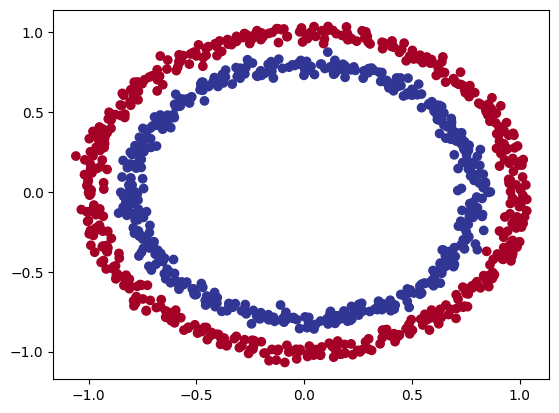

In [10]:
# Visualization

import matplotlib.pyplot as plt
plt.scatter(x=X[:,0],
            y=X[:,1],
            c=y,
            cmap=plt.cm.RdYlBu);

Note : The data we are working with is oftern referred to as a toy dataset

### 1.1 Check input and output shapes

In [11]:
X.shape, y.shape

((1000, 2), (1000,))

In [12]:
# View the first examples of features and labels

X_sample = X[0]
y_sample = y[0]

print(f'Values for one sample of X: {X_sample} and the same for y:{y_sample}')
print(f'Shapes for one sample of X:{X_sample.shape} and the same for y:{y_sample.shape}')

Values for one sample of X: [0.75424625 0.23148074] and the same for y:1
Shapes for one sample of X:(2,) and the same for y:()


### 1.2 Turn data into tensors and create train and test splits

In [13]:
import torch
torch.__version__

'2.1.0+cu121'

In [14]:
type(X), X.dtype

(numpy.ndarray, dtype('float64'))

In [15]:
# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [16]:
X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [17]:
type(X), X.dtype, y.dtype

(torch.Tensor, torch.float32, torch.float32)

In [18]:
# Split data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

len(X_train), len(y_train), len(X_test), len(y_test)

(800, 800, 200, 200)

## 2. Building a model

Let's build a model to classify our blue and red dots.

To do so, we want to:
1. Setup device agonistic code so our code will run on an accelerator(GPU) if there is one
2. Construct a model (by subclassing 'nn.Module')
3. Define a loss function and optimizer
4. Training and testing loop

In [19]:
# Import PyTorch

In [20]:
import torch
from torch import nn

# Make device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [21]:
X_train

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        ...,
        [ 0.0157, -1.0300],
        [ 1.0110,  0.1680],
        [ 0.5578, -0.5709]])

# Create a model
1. Subclass 'nn.Module'
2. Create 2 'nn.Linear()'  - layers capable of handling the shapes of our data
3. Defines a 'forward()' method that outlines the forward pass
4. Instatiate an instance of our model class and sent it to the target device

In [22]:
# 1. Construct a model
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    # 2. Create 2 nn.Linear() capable of handling the shapes of our data
    self.layer_1 = nn.Linear(in_features=2,  # takes in 2 feature and upscales to 5 features
                             out_features=5)

    self.layer_2 = nn.Linear(in_features=5,  # takes in 5 feature from previous layer and output a single feature which is same as y
                             out_features=1)
  # 3. Define a forward() method that outlines the forward pass
  def forward(self, x):
    return self.layer_2(self.layer_1(x)) # x -> layer_1 -> layer_2 -> output

# 4. Instatiate an instance of our model class and send it ot the target device

model_0 = CircleModelV0().to(device)
model_0


CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

nn. Linear -  performs y = x*w + bias

Why do there are 5 outfeatures?
 * This is because model have more * features to learn on.
 * This numer is arbitary
 * Generally its multiple of 8
 * called hidden units
 * More hidden feature are more opourtinity are model have to learn.

In [23]:
device

'cuda'

In [24]:
next(model_0.parameters()).device

device(type='cuda', index=0)

In [25]:
# Lets replecate the model above using nn.Sequential()

model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5,out_features=1),
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [26]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.0624,  0.3763],
                      [-0.1734, -0.5167],
                      [ 0.0635,  0.1911],
                      [ 0.3868,  0.3593],
                      [-0.6131, -0.3872]], device='cuda:0')),
             ('0.bias',
              tensor([-0.4714, -0.3748, -0.6955, -0.0428, -0.2263], device='cuda:0')),
             ('1.weight',
              tensor([[ 0.3405, -0.0057,  0.2139, -0.0645,  0.2439]], device='cuda:0')),
             ('1.bias', tensor([0.1562], device='cuda:0'))])

In [27]:
# Make predictions
with torch.inference_mode():
  untrained_preds = model_0(X_test.to(device))
print(f'Length of predictions: {len(untrained_preds)}, Shape:{untrained_preds.shape}')
print(f'Lenght if test samples: {len(X_test)}, Shape:{X_test.shape}')
print(f'\nFirst 10 predictions:\n{untrained_preds[:10]}')
print(f'\nFirst 10 labels:\n{y_test[:10]}')

Length of predictions: 200, Shape:torch.Size([200, 1])
Lenght if test samples: 200, Shape:torch.Size([200, 2])

First 10 predictions:
tensor([[-0.1142],
        [-0.1533],
        [-0.1230],
        [-0.1112],
        [-0.2996],
        [-0.3220],
        [-0.2921],
        [-0.3321],
        [-0.1155],
        [-0.1578]], device='cuda:0')

First 10 labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [28]:
X_test[:10], y_test[:10]

(tensor([[-0.3752,  0.6827],
         [ 0.0154,  0.9600],
         [-0.7028, -0.3147],
         [-0.2853,  0.9664],
         [ 0.4024, -0.7438],
         [ 0.6323, -0.5711],
         [ 0.8561,  0.5499],
         [ 1.0034,  0.1903],
         [-0.7489, -0.2951],
         [ 0.0538,  0.9739]]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

### 2.1 Setup loss function and optimizer

* For regression use MAE or MSE

* For classification binary cross entropy or categorical cross entropy

* Optimizer SGD or Adam

In [29]:
#  Setup the loss function

# loss_fn = nn.BCELoss() - also exist but need to pass through sigmod activation function before
loss_fn = nn.BCEWithLogitsLoss() # - Sigmoid activiation function built-in

optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)


# loss function check how much are model is wrong in compare to truth
# optimizer changes the parameter in such a way that loss function goes down

In [30]:
# Calculate accuracy - out of 100 examples, what percentage does our model get right?

def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/len(y_pred))*100
  return acc

### 3. Train model

To train our model, we need training loop:

1. Forward pass
2. Calculate the loss
3. Optimizer zero grad
4. Loss backward (backpropagation)
5. Optimizer step (gradient descent)

### 3.1 Going from raw logits -> prediction probabiliets->predeiction labels

* Our model outputs are going to be raw logits.

* We can convert these logit into prediction probabilities by passing them to some kind of activation function(eg sigmoid for binary classfication and softmax for multiclass classification).

* Then we can convert out model's prediction probabilities to prediction labels by either rouding them or taking the argmax().

In [31]:
# View the first 5 outputs of the forward pass on the test data
model_0.eval()
with torch.inference_mode():
  y_logits= model_0(X_test.to(device))[:5]
y_logits

tensor([[-0.1142],
        [-0.1533],
        [-0.1230],
        [-0.1112],
        [-0.2996]], device='cuda:0')

In [32]:
# Use the sigmoid activation function on our model logits to turn into prediction probabilities

y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4715],
        [0.4618],
        [0.4693],
        [0.4722],
        [0.4257]], device='cuda:0')

for our prediction probabilities values, we need to perform a range-style rounding on them:
* y_pred_probs >=0.5 - y=1 (class 1)
* y_pred_probs <0.5 - y=0 (class 0)

In [33]:
# Find the predicted labels
y_preds = torch.round(y_pred_probs)

# In full
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

# Check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# Get rid of extra dimension
y_preds.squeeze()

tensor([True, True, True, True, True], device='cuda:0')


tensor([0., 0., 0., 0., 0.], device='cuda:0')

### 3.2 Building a training and testing loop



In [34]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set the number of epochs
epochs = 101

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Build training and evaluation loop
for epoch in range(epochs):
  ### Training
  model_0.train()

  # 1. Forward pass
  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  # 2. Calculate loss/accuracy
  # loss = loss_fn(torch.sigmoid(y_logits), # nn.BCELoss expects prediction probabilities as input
  #,               y_train)
  loss = loss_fn(y_logits,   ## nn.BCEWithLogitsLoss expects raw logits as input
                 y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backward
  loss.backward()

  # 5. Optimizer step - update the parameters to reduce the gradients
  optimizer.step()

  ### Testing
  model_0.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # 2. Calculate test loss/acc
    test_loss = loss_fn(test_logits,
                        y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)

  # Print out what's happenin
  if epoch%10==0:
    print(f'Epoch:{epoch}|Loss:{loss:.5f}, Acc:{acc:.2f}%|Test loss:{test_loss:.5f}|Test acc:{test_acc:.2f}%')


Epoch:0|Loss:0.69951, Acc:50.00%|Test loss:0.69838|Test acc:50.00%
Epoch:10|Loss:0.69582, Acc:41.88%|Test loss:0.69545|Test acc:42.50%
Epoch:20|Loss:0.69450, Acc:47.75%|Test loss:0.69458|Test acc:46.00%
Epoch:30|Loss:0.69399, Acc:49.25%|Test loss:0.69438|Test acc:46.00%
Epoch:40|Loss:0.69376, Acc:49.88%|Test loss:0.69440|Test acc:48.00%
Epoch:50|Loss:0.69364, Acc:49.38%|Test loss:0.69449|Test acc:50.50%
Epoch:60|Loss:0.69356, Acc:49.62%|Test loss:0.69458|Test acc:51.00%
Epoch:70|Loss:0.69351, Acc:49.62%|Test loss:0.69467|Test acc:50.00%
Epoch:80|Loss:0.69346, Acc:50.25%|Test loss:0.69476|Test acc:50.00%
Epoch:90|Loss:0.69343, Acc:50.12%|Test loss:0.69483|Test acc:50.50%
Epoch:100|Loss:0.69339, Acc:50.25%|Test loss:0.69489|Test acc:51.00%


## 4. Make predictions and evaluate the model

From the metrics it looks like our model isn't learning anything....

So to inspect it lets make some predictions and make them visual!

To do so, we're going to import a function called 'plot_decision_boundary()'



def plot_decision_boundary(model: torch.nn.Module, X: torch.Tensor, y: torch.Tensor):
    # Put everything to CPU (works better with NumPy + Matplotlib)
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")

    # Setup prediction boundaries and grid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101), np.linspace(y_min, y_max, 101))

    # Make features
    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Make predictions
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on)

    # Test for multi-class or binary and adjust logits to prediction labels
    if len(torch.unique(y)) > 2:
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)  # mutli-class
    else:
        y_pred = torch.round(torch.sigmoid(y_logits))  # binary

    # Reshape preds and plot
    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

In [35]:
import requests
from pathlib import Path

# Download helper function from Learn Pytorch repo
if Path('helper_functions.py').is_file():
  print('Helper_function.py already exists, skipping download')
else:
  print('Helper_function.py does not exits, downloading')
  request = requests.get('https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py')
  with open('helper_functions.py','wb') as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary


Helper_function.py does not exits, downloading


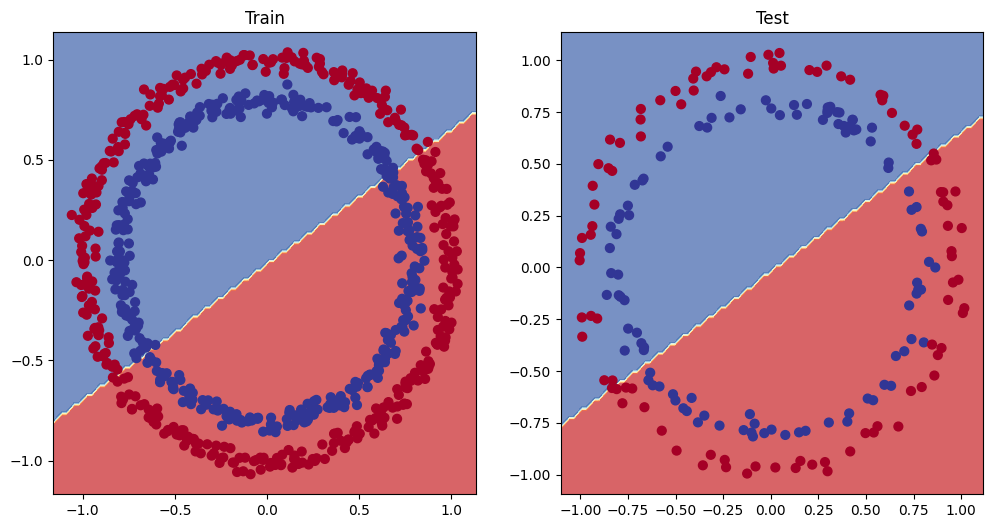

In [36]:
# Plot decision boundary of the model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Train')
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1,2,2)
plt.title('Test')
plot_decision_boundary(model_0,X_test, y_test)

### 5. Improving a model (from a model perspective)

* Add more layers - give the model more chances to learn about patterns in the data
* Add more hidden units - go from 5 hidden units to 10 hidden units
* Fit for longer
* Changing the activation functions
* Change the learning rate
* Change the loss function


These options are all from a model's perspective because they deal directly with the model, rather than the data.




Lets try to improve the model by:
* Adding more hidden units - 5 to 10
* Increase number of layer : 2 to 3
* Increase the number of epochs: 10 to 1000

In [37]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)
  def forward(self, x):
    #z = self.layer_1(x)
    #z = self.layer_2(z)
    #z = self.layer_3(z)
    #return z
    return self.layer_3(self.layer_2(self.layer_1(x))) # faster

model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [38]:
# Create a loss function
loss_fn = nn.BCEWithLogitsLoss()

# Create an optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)

In [39]:
# Training and evaulation loop for model_1
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1001

for epoch in range(epochs):
  model_1.train()

  y_logits = model_1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true = y_train,
                    y_pred=y_pred)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model_1.eval()
  with torch.inference_mode():
    test_logits = model_1(X_test).squeeze()
    t_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits,
                        y_test)
    test_acc = accuracy_fn(y_true = y_test,
                           y_pred=test_pred)

  if epoch%100 == 0:
    print(f'Epoch: {epoch}|Loss: {loss:.5f}, Acc:{acc:.2f}%|Test losss:{test_loss:.5f}|Test acc:{test_acc:.2f}%')

Epoch: 0|Loss: 0.69396, Acc:50.88%|Test losss:0.69261|Test acc:51.00%
Epoch: 100|Loss: 0.69305, Acc:50.38%|Test losss:0.69379|Test acc:51.00%
Epoch: 200|Loss: 0.69299, Acc:51.12%|Test losss:0.69437|Test acc:51.00%
Epoch: 300|Loss: 0.69298, Acc:51.62%|Test losss:0.69458|Test acc:51.00%
Epoch: 400|Loss: 0.69298, Acc:51.12%|Test losss:0.69465|Test acc:51.00%
Epoch: 500|Loss: 0.69298, Acc:51.00%|Test losss:0.69467|Test acc:51.00%
Epoch: 600|Loss: 0.69298, Acc:51.00%|Test losss:0.69468|Test acc:51.00%
Epoch: 700|Loss: 0.69298, Acc:51.00%|Test losss:0.69468|Test acc:51.00%
Epoch: 800|Loss: 0.69298, Acc:51.00%|Test losss:0.69468|Test acc:51.00%
Epoch: 900|Loss: 0.69298, Acc:51.00%|Test losss:0.69468|Test acc:51.00%
Epoch: 1000|Loss: 0.69298, Acc:51.00%|Test losss:0.69468|Test acc:51.00%


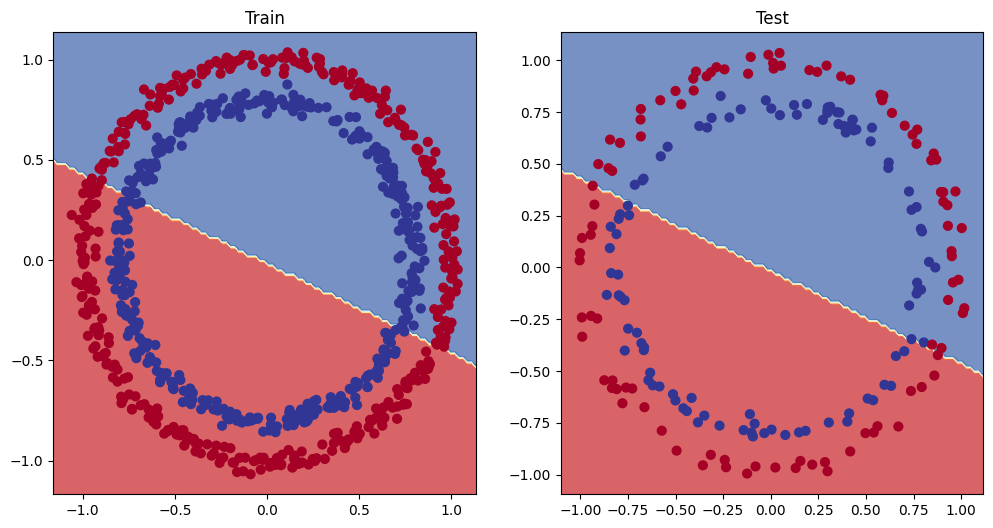

In [40]:
# Plot the decision boundary
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Train')
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1,2,2)
plt.title('Test')
plot_decision_boundary(model_1,X_test, y_test)

### 5.1 Preparing data to see if our model can fit a straight line

One way to troubleshoot to a larger problem is to test out a smaller problem

In [41]:
# Create some data (same as notebook 01)

weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

# Create data
X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias

print(len(X_regression))
X_regression[:5], y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [42]:
# Create train and test splits
split = int(0.8 * len(X_regression))
X_train_regression, y_train_regression = X_regression[:split], y_regression[:split]
X_test_regression, y_test_regression = X_regression[split:], y_regression[split:]

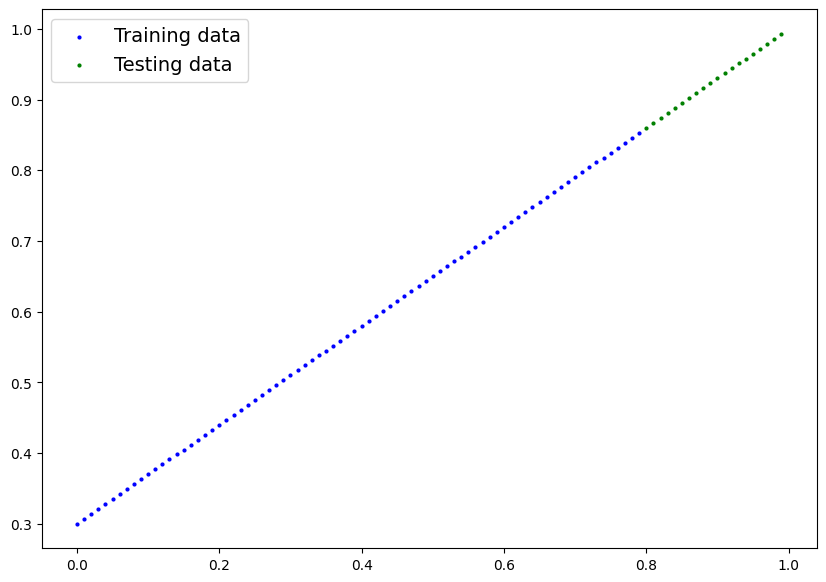

In [43]:
plot_predictions(train_data=X_train_regression,
                 train_labels=y_train_regression,
                 test_data=X_test_regression,
                 test_labels=y_test_regression)

In [44]:
### 5.2 Adjusting model_1 to fit a straigt line

# Same architecture as model_1 (but using nn.Sequential())

model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [45]:
# Loss and optimzer

loss_fn = nn.L1Loss()

optimzer = torch.optim.SGD(params=model_2.parameters(),
                           lr=0.01)

In [46]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1001

X_train_regression, y_train_regression = X_train_regression.to(device),y_train_regression.to(device)
X_test_regression, y_test_regression = X_test_regression.to(device), y_test_regression.to(device)

for epoch in range(epochs):
  model_2.train()
  y_pred = model_2(X_train_regression)
  loss = loss_fn(y_pred, y_train_regression)
  optimzer.zero_grad()
  loss.backward()
  optimzer.step()

  model_2.eval()
  with torch.inference_mode():
    test_pred = model_2(X_test_regression)
    test_loss = loss_fn(test_pred, y_test_regression)

  if epoch%100 == 0:
    print(f'Epoch:{epoch}|Loss:{loss:.5f}|Test loss:{test_loss:.5f}')

Epoch:0|Loss:0.75986|Test loss:0.91103
Epoch:100|Loss:0.02858|Test loss:0.00081
Epoch:200|Loss:0.02533|Test loss:0.00209
Epoch:300|Loss:0.02137|Test loss:0.00305
Epoch:400|Loss:0.01964|Test loss:0.00341
Epoch:500|Loss:0.01940|Test loss:0.00387
Epoch:600|Loss:0.01903|Test loss:0.00379
Epoch:700|Loss:0.01878|Test loss:0.00381
Epoch:800|Loss:0.01840|Test loss:0.00329
Epoch:900|Loss:0.01798|Test loss:0.00360
Epoch:1000|Loss:0.01782|Test loss:0.00333


In [47]:
# Turn on evaulation mode

model_2.eval()

with torch.inference_mode():
  y_preds = model_2(X_test_regression)

y_preds

tensor([[0.8596],
        [0.8663],
        [0.8730],
        [0.8797],
        [0.8864],
        [0.8931],
        [0.8998],
        [0.9065],
        [0.9131],
        [0.9198],
        [0.9265],
        [0.9332],
        [0.9399],
        [0.9466],
        [0.9533],
        [0.9600],
        [0.9666],
        [0.9733],
        [0.9800],
        [0.9867]], device='cuda:0')

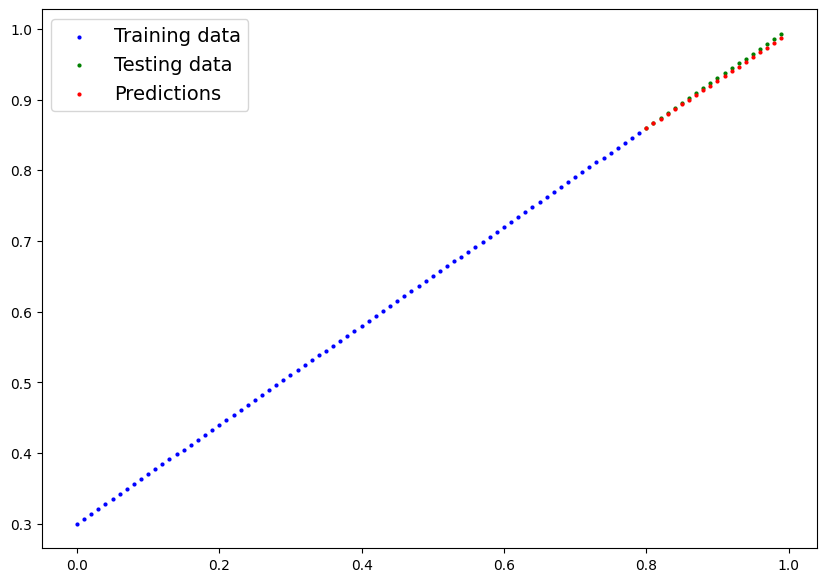

In [48]:
plot_predictions(train_data=X_train_regression.cpu(),
                 train_labels=y_train_regression.cpu(),
                 test_data=X_test_regression.cpu(),
                 test_labels=y_test_regression.cpu(),
                 predictions=y_preds.cpu())

## 6. The missing piece : non-linearity

#### 6.1 Recreating non-linear data (red and blue circles)

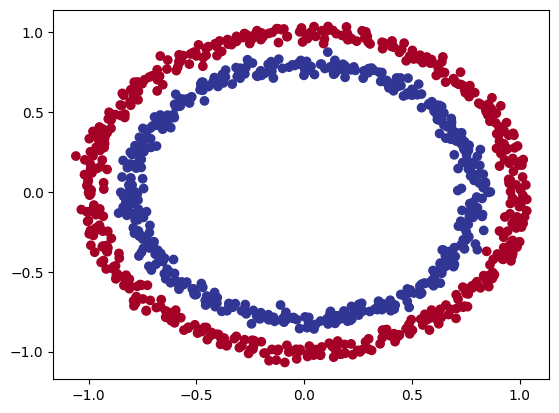

In [49]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

plt.scatter(X[:,0], X[:,1], c=y,cmap=plt.cm.RdYlBu);

In [50]:
# Convert data to tensors and then to train and test splits

import torch
from sklearn.model_selection import train_test_split

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)
X_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

#### 6.2 Building a model with non-linearity

In [51]:
# Build a model with non_linear activation functions
from torch import nn

class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)
    self.relu = nn.ReLU() # turns negative input to zero and leave the postive input as they were

  def forward(self,x):
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

In [52]:
model_3 = CircleModelV2().to(device)
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [53]:
# Loss and optimizer

loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(params=model_3.parameters(),
                            lr=0.01)

#### 6.3 Training a model with non-linearity

In [54]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

X_train, y_train = X_train.to(device), y_train.to(device)
X_test , y_test = X_test.to(device), y_test.to(device)

epochs = 10001

for epoch in range(epochs):
  model_3.train()
  y_logits = model_3(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_3.eval()
  with torch.inference_mode():
    test_logits = model_3(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)
  if epoch%100==0:
    print(f'Epoch:{epoch}|Train loss:{loss:.5f}|Acc:{acc:.2f}%|Test loss:{test_loss:.5f}|Test acc:{test_acc:.2f}%')


Epoch:0|Train loss:0.69295|Acc:50.00%|Test loss:0.69325|Test acc:50.00%
Epoch:100|Train loss:0.69248|Acc:50.38%|Test loss:0.69264|Test acc:50.00%
Epoch:200|Train loss:0.69225|Acc:59.00%|Test loss:0.69233|Test acc:56.00%
Epoch:300|Train loss:0.69209|Acc:70.12%|Test loss:0.69214|Test acc:67.00%
Epoch:400|Train loss:0.69195|Acc:68.38%|Test loss:0.69197|Test acc:70.00%
Epoch:500|Train loss:0.69181|Acc:58.50%|Test loss:0.69179|Test acc:62.00%
Epoch:600|Train loss:0.69168|Acc:54.00%|Test loss:0.69163|Test acc:56.00%
Epoch:700|Train loss:0.69155|Acc:53.25%|Test loss:0.69148|Test acc:53.00%
Epoch:800|Train loss:0.69141|Acc:52.62%|Test loss:0.69133|Test acc:53.00%
Epoch:900|Train loss:0.69128|Acc:52.75%|Test loss:0.69118|Test acc:53.00%
Epoch:1000|Train loss:0.69115|Acc:53.00%|Test loss:0.69104|Test acc:52.50%
Epoch:1100|Train loss:0.69103|Acc:52.88%|Test loss:0.69089|Test acc:53.00%
Epoch:1200|Train loss:0.69090|Acc:53.12%|Test loss:0.69075|Test acc:54.00%
Epoch:1300|Train loss:0.69077|Acc:53.

#### 6.4 Evaluating a model trained with non-linear activation functions

In [55]:
# Make predictions
model_3.eval()
with torch.inference_mode():
  y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()

y_preds[:10], y_test[:10]

(tensor([1., 0., 1., 0., 0., 1., 0., 0., 1., 0.], device='cuda:0'),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'))

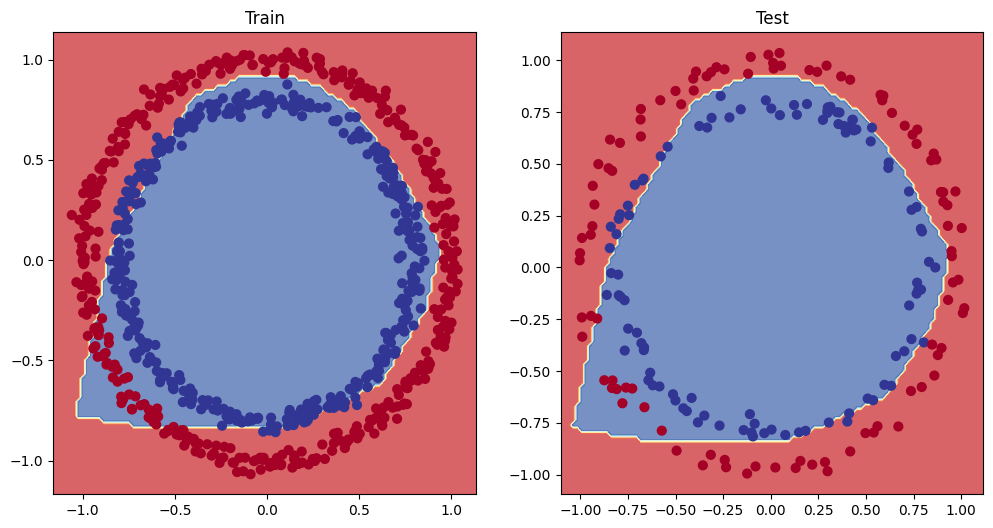

In [56]:
# Plot the decision boundary
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Train')
plot_decision_boundary(model_3, X_train, y_train)
plt.subplot(1,2,2)
plt.title('Test')
plot_decision_boundary(model_3,X_test, y_test)

## 7. Replicating non-linear activation functions

In [57]:
# Create a tensor

A = torch.arange(-10,10,1,dtype=torch.float32)

In [58]:
A.dtype

torch.float32

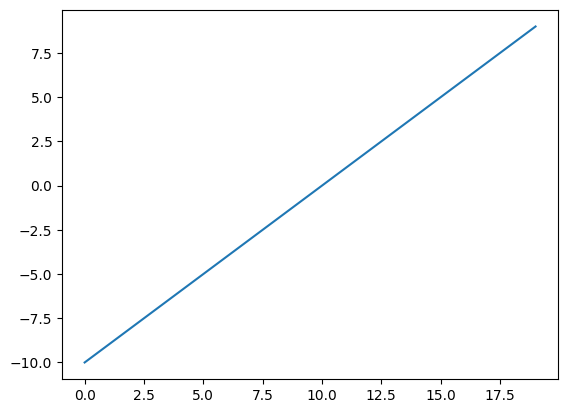

In [59]:
# Visualize the tensor
plt.plot(A);

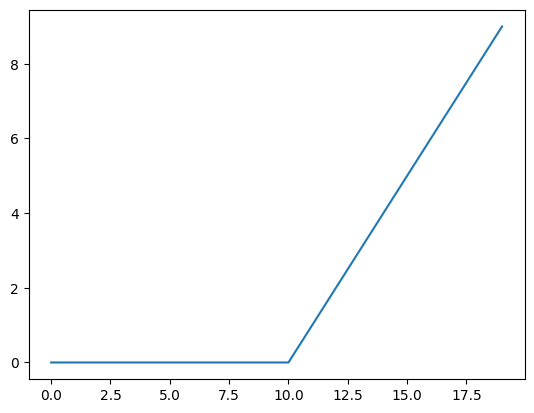

In [60]:
plt.plot(torch.relu(A));

In [61]:
def relu(x: torch.Tensor) -> torch.Tensor:
  return torch.maximum(torch.tensor(0),x) # input must be tensor

relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

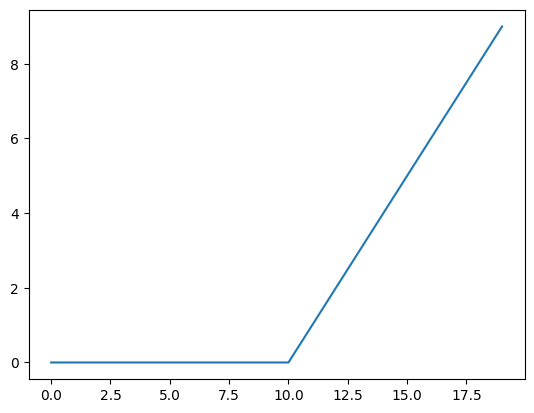

In [62]:
# Plot ReLU activation function
plt.plot(relu(A));

In [63]:
# Sigmoid function

def sigmoid(x):
  return 1/(1+torch.exp(-x))

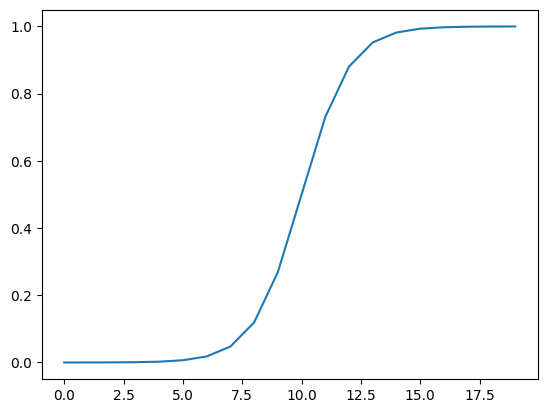

In [64]:
plt.plot(torch.sigmoid(A));

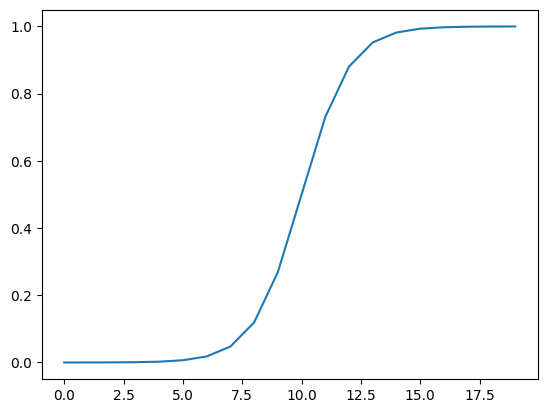

In [65]:
plt.plot(sigmoid(A));

## 8. Putting it all together with a multi-class classification problem

### 8.1 Creating a toy multi-class dataset

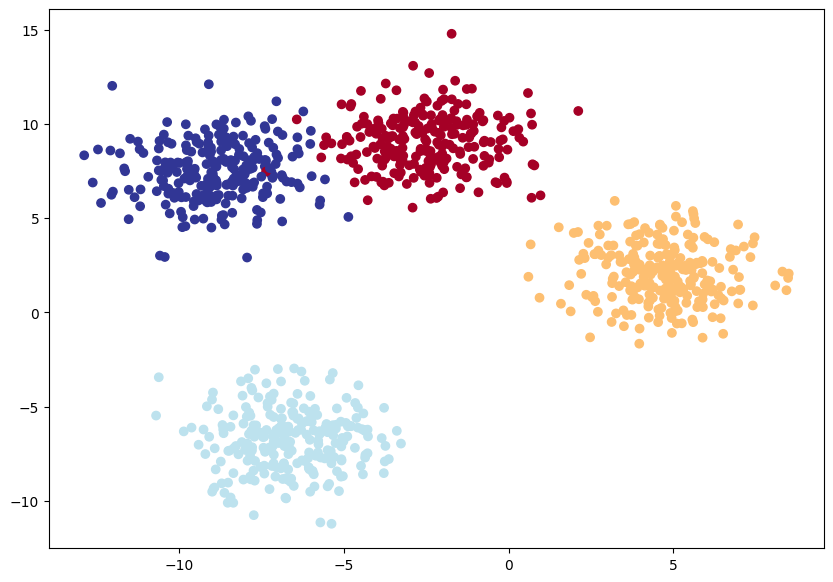

In [66]:
# Import dependencies
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Set the hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. Create multi-class data
X_blob, y_blob = make_blobs(n_samples=1000,
                            n_features=NUM_FEATURES,
                            centers=NUM_CLASSES,
                            cluster_std=1.5, # give the clusters a little shape up
                            random_state=RANDOM_SEED)

# 2. Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

# 3. Split into train and test
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
                                                                        y_blob,
                                                                        test_size=0.2,
                                                                        random_state=RANDOM_SEED)
# 4. Plot data
plt.figure(figsize=(10,7))
plt.scatter(X_blob[:,0], X_blob[:,1], c=y_blob, cmap=plt.cm.RdYlBu);

### 8.2 Building a multi-class classification model in PyTorch

In [67]:
# Create device agnostic code
device = 'cuda' if torch.cuda.is_available else 'cpu'
device

'cuda'

In [68]:
# Build a multi-class classfication model

class BlobModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units=8):
    """ Initializes multi-class classification model

    Args:
      input_features (int) : Number of input features to the model
      output_features (int) : Number of output features (number of output classes)
      hidden_untis (int) : Number of hidden between layers, default 8

    Returns:

    Examples:
    """
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features=input_features, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_features)
    )

  def forward(self,x):
    return self.linear_layer_stack(x)

# Create an instance of BlobModel and send it to the target device
model_4 = BlobModel(input_features=2,
                    output_features=4,
                    hidden_units=8).to(device)

model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

### 8.3 Create a loss function and an optimizer

In [69]:
loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(params=model_4.parameters(),
                            lr=0.1)

### 8.4 Getting prediction probabilities

Logits(raw output of the model)-> Pred probs(use torch.softmax) -> Pred labels(take the argmax of the prediction probabilities)

In [70]:
model_4.eval()
with torch.inference_mode():
  y_logits=model_4(X_blob_test.to(device))
y_logits[:10]

tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834],
        [-0.1497, -1.0617, -0.7107, -0.1645],
        [ 0.1539, -0.2887,  0.1520, -0.0109],
        [-0.2154, -1.1795, -0.9300, -0.2745],
        [ 0.2443, -0.2472,  0.1649,  0.0061],
        [-0.2329, -1.2120, -0.9849, -0.3004]], device='cuda:0')

In [71]:
y_blob_test[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

In [72]:
# Convert model's logit output to prediction probabilites
y_pred_probs = torch.softmax(y_logits,dim=1)
print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834]], device='cuda:0')
tensor([[0.3169, 0.3244, 0.1405, 0.2182],
        [0.3336, 0.1432, 0.2026, 0.3206],
        [0.3011, 0.1843, 0.2823, 0.2323],
        [0.3078, 0.2766, 0.1836, 0.2320],
        [0.3719, 0.1286, 0.1532, 0.3463]], device='cuda:0')


In [73]:
torch.sum(y_pred_probs[0])

tensor(1., device='cuda:0')

In [74]:
torch.argmax(y_pred_probs[0])

tensor(1, device='cuda:0')

In [75]:
# Convert model's prediction probabilites to prediction labels
y_preds = torch.argmax(y_pred_probs,dim=1)
y_preds

tensor([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 0, 1], device='cuda:0')

In [76]:
y_blob_test

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 3, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1])

### 8.5 Creating a training loop and testing loop

In [77]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 101

X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

for epoch in range(epochs):
  model_4.train()

  y_logits = model_4(X_blob_train)
  y_pred = torch.softmax(y_logits,dim=1).argmax(dim=1)

  loss = loss_fn(y_logits, y_blob_train)
  acc = accuracy_fn(y_true=y_blob_train,
                    y_pred=y_pred)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_4.eval()
  with torch.inference_mode():
    test_logits=model_4(X_blob_test)
    test_pred = torch.softmax(test_logits,dim=1).argmax(dim=1)

    test_loss = loss_fn(test_logits,y_blob_test)
    test_acc = accuracy_fn(y_true=y_blob_test,
                           y_pred=test_pred)

  if epoch%10==0:
    print(f'Epoch:{epoch}|Loss:{loss:.5f}|Acc:{acc:.2f}%|Test loss:{test_loss:.5f}|Test acc:{test_acc:.2f}%')

Epoch:0|Loss:1.15883|Acc:40.38%|Test loss:1.07554|Test acc:48.00%
Epoch:10|Loss:0.64476|Acc:96.75%|Test loss:0.66069|Test acc:97.50%
Epoch:20|Loss:0.42535|Acc:98.50%|Test loss:0.43074|Test acc:100.00%
Epoch:30|Loss:0.25294|Acc:99.12%|Test loss:0.24508|Test acc:99.50%
Epoch:40|Loss:0.11232|Acc:99.25%|Test loss:0.10229|Test acc:99.50%
Epoch:50|Loss:0.06627|Acc:99.25%|Test loss:0.05848|Test acc:99.50%
Epoch:60|Loss:0.05068|Acc:99.25%|Test loss:0.04293|Test acc:99.50%
Epoch:70|Loss:0.04300|Acc:99.25%|Test loss:0.03491|Test acc:99.50%
Epoch:80|Loss:0.03836|Acc:99.25%|Test loss:0.02988|Test acc:99.50%
Epoch:90|Loss:0.03525|Acc:99.25%|Test loss:0.02663|Test acc:99.50%
Epoch:100|Loss:0.03312|Acc:99.25%|Test loss:0.02433|Test acc:99.50%


### 8.6 Making and evaluating predictions with a PyTorch multi-class model

In [78]:
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test)

y_logits[:10]

tensor([[-0.6257,  6.0063, -7.6488, -8.4666],
        [-2.1813, -6.3889, -3.7303,  3.1376],
        [-3.4241, -3.9088,  3.1701, -2.6211],
        [-1.1539,  4.2110, -3.8565, -4.8926],
        [ 3.7713, -1.3379, -9.1623, -6.9665],
        [-2.8284, -7.5936, -4.3072,  3.8118],
        [-3.0427, -3.3442,  2.8070, -2.1454],
        [ 3.3902, -4.0445, -6.9149, -3.5610],
        [-4.3793, -5.0066,  3.8291, -3.3930],
        [ 3.5159, -3.0320, -7.5575, -4.7203]], device='cuda:0')

In [79]:
y_pred_prob = torch.softmax(y_logits,dim=1)
y_pred_prob[:10]

tensor([[1.3158e-03, 9.9868e-01, 1.1725e-06, 5.1754e-07],
        [4.8691e-03, 7.2458e-05, 1.0344e-03, 9.9402e-01],
        [1.3611e-03, 8.3833e-04, 9.9476e-01, 3.0383e-03],
        [4.6540e-03, 9.9492e-01, 3.1196e-04, 1.1070e-04],
        [9.9397e-01, 6.0044e-03, 2.4010e-06, 2.1578e-05],
        [1.3046e-03, 1.1117e-05, 2.9733e-04, 9.9839e-01],
        [2.8462e-03, 2.1055e-03, 9.8807e-01, 6.9819e-03],
        [9.9842e-01, 5.8947e-04, 3.3409e-05, 9.5600e-04],
        [2.7205e-04, 1.4528e-04, 9.9885e-01, 7.2945e-04],
        [9.9829e-01, 1.4306e-03, 1.5493e-05, 2.6444e-04]], device='cuda:0')

In [80]:
y_preds = torch.argmax(y_pred_prob,dim=1)
y_preds[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0], device='cuda:0')

In [81]:
y_blob_test[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0], device='cuda:0')

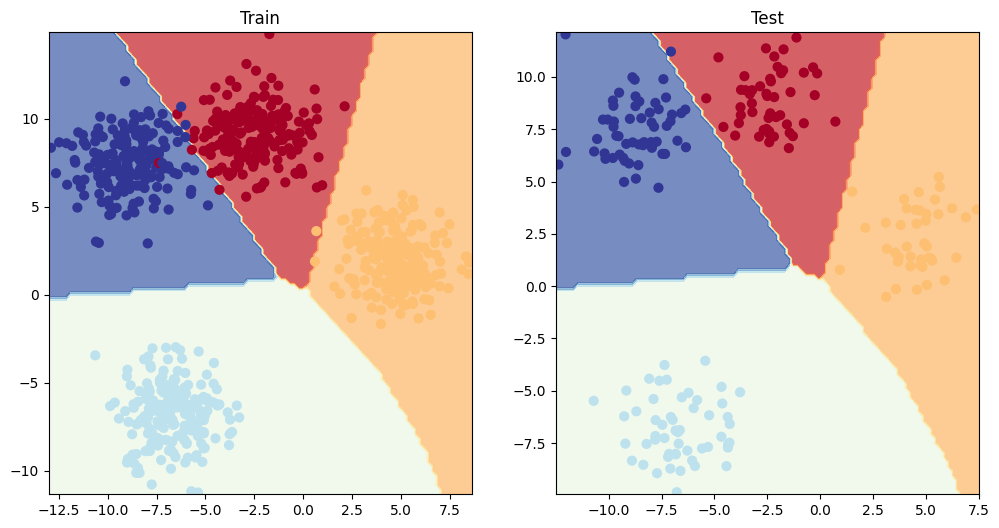

In [82]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Train')
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1,2,2)
plt.title('Test')
plot_decision_boundary(model_4,X_blob_test, y_blob_test)

## 9. A few more classification metrics (to evaluate classfication model)


* Accuracy - out of 100 example, how many our models get right
* Precision
* Recall
* F1-score
* Confusion matrix
* Classification report

In [83]:
!pip install torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 840.2/840.2 kB 17.3 MB/s eta 0:00:00


In [87]:
from torchmetrics import Accuracy

torchmetric_accuracy = Accuracy().to(device)

torchmetric_accuracy(y_preds, y_blob_test)

TypeError: Accuracy.__new__() missing 1 required positional argument: 'task'

In [86]:
torchmetric_accuracy.device

NameError: name 'torchmetric_accuracy' is not defined